# Machine Learning Model to predict if Global Intensity is greater than 15

## 1. Data Loading

In [1]:
# Importing all packages

import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # this is used for the plot the graph 

In [2]:
%%time
# Importing dataset

df= pd.read_csv("C:/Users/Rutu/Desktop/B6TA1/Project/hpc_breakdowns.csv",parse_dates={'dt' : ['Date', 'Time']}, 
                infer_datetime_format=True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(10)

Wall time: 19.5 s


,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [3]:
# Adding a column to check condition for classification
df['Global_intensity_new']=df.Global_intensity>15.0
df[['Global_intensity_new']] = df[['Global_intensity_new']].astype(int)
df.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_new
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,1
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,1
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,1
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,1


## 2. Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
dt                       datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Global_intensity_new     int32
dtypes: datetime64[ns](1), float64(7), int32(1)
memory usage: 132.9 MB


In [5]:
df.dtypes

dt                       datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Global_intensity_new              int32
dtype: object

In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_new
count,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06,2.049280e+06
mean,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00,3.784500e-02
std,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00,1.908213e-01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.000000e+00


In [7]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Global_intensity_new'],
      dtype='object')

### Data Visualization

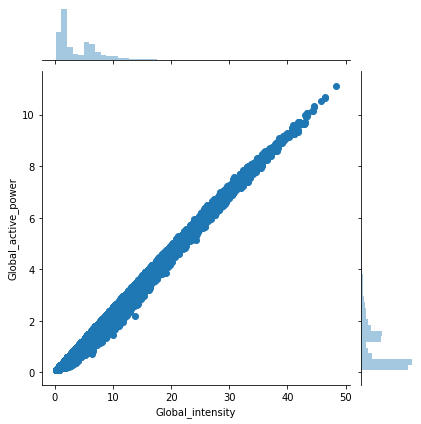

In [8]:
# The correlations between 'Global_intensity', 'Global_active_power'

import seaborn as sns
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

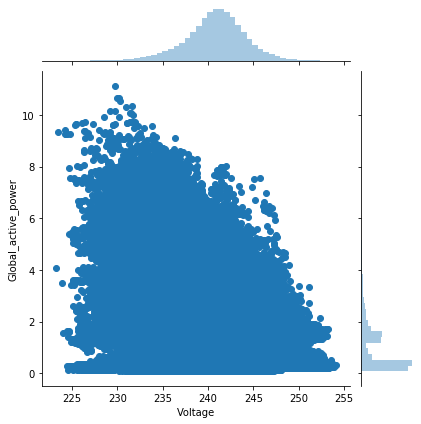

In [9]:
## The correlations between 'Voltage' and  'Global_active_power'

sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()

### From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

(8, 0)

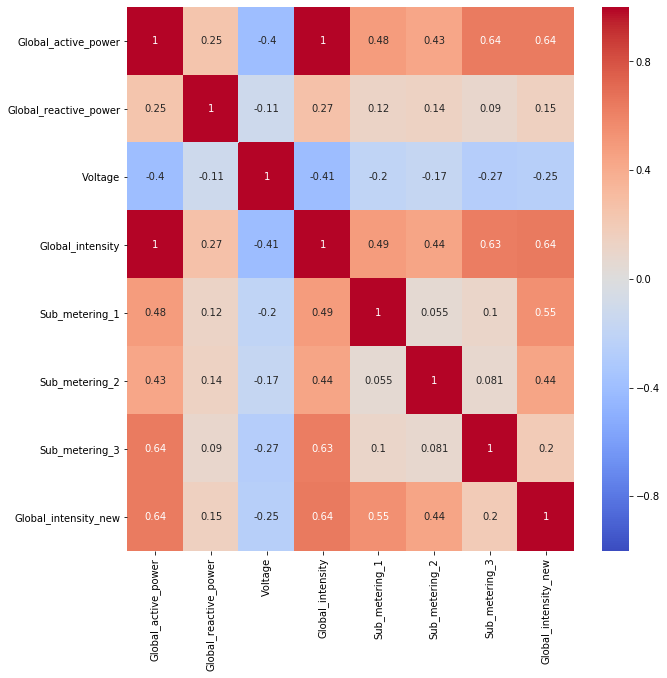

In [10]:
# Calculate correlations among Columns

plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
ax.set_ylim(8, 0)

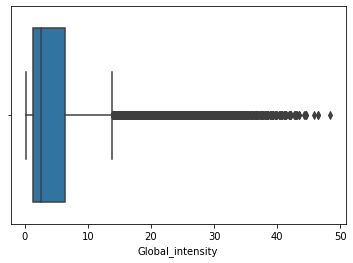

In [11]:
# Checking the Outliers

import seaborn as sb
sb.boxplot(x=df["Global_intensity"],data=df)

In [11]:
# Checking for null values

df.isnull().sum().sort_values()

dt                          0
Global_intensity_new        0
Sub_metering_3            129
Global_reactive_power     477
Sub_metering_2           1210
Sub_metering_1           1297
Global_intensity         2001
Voltage                  2031
Global_active_power      2043
dtype: int64

In [12]:
# List Unique values

for j in range(0,9):
       print(df.iloc[:, j].unique())

['2006-12-16T17:24:00.000000000' '2006-12-16T17:25:00.000000000'
 '2006-12-16T17:26:00.000000000' ... '2010-11-26T21:00:00.000000000'
 '2010-11-26T21:01:00.000000000' '2010-11-26T21:02:00.000000000']
[4.216 5.36  5.374 ... 3.626 4.214 3.124]
[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 

## 3. Data Cleaning

In [13]:
# Finding all columns that have nan (Dealing with missing values)

droping_list_all=[]
for j in range(0,9):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
droping_list_all

[1, 2, 3, 4, 5, 6, 7]

In [14]:
# Filling nan with mean in any columns

for j in range(0,9):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [15]:
# Check to make sure that there are not more any 'nan'

df.isnull().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Global_intensity_new     0
dtype: int64

In [16]:
# Check Duplicates

df["is_duplicate"]= df.duplicated()
df.shape

(2049280, 10)

In [17]:
# Remove Duplicates 

df = df.drop_duplicates(subset=None,keep="first") # Dropping duplicate rows
df=df.drop(['is_duplicate'],axis=1)  # Dropping created 'is_duplicate' column 
df.shape

(2049280, 9)

## 4. Data Transformation

In [18]:
# Grab the last 200000 rows and assign it to seperate dataframe

validdata = df.tail(200000)
validdata

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_new
1849280,2010-07-02 07:58:00,0.376,0.208,237.01,1.8,0.0,0.0,1.0,0
1849281,2010-07-02 07:59:00,0.380,0.218,239.24,1.8,0.0,0.0,0.0,0
1849282,2010-07-02 08:00:00,0.378,0.216,238.64,1.8,0.0,0.0,1.0,0
1849283,2010-07-02 08:01:00,0.378,0.218,239.13,1.8,0.0,0.0,1.0,0
1849284,2010-07-02 08:02:00,0.376,0.214,238.32,1.8,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,0
2049276,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,0
2049277,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,0
2049278,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,0


In [19]:
# Slice out the bottom 200,000 observations for Project tests

df.drop(df.tail(200000).index,inplace=True)

In [20]:
# Data for Training and Testing

df.shape

(1849280, 9)

In [21]:
# Data for Validation Test

validdata.shape

(200000, 9)

## 5. Data Pre-processing

In [24]:
# Preparing Data for training and testing

X_train = df.drop(columns=['dt','Global_intensity','Global_intensity_new'],axis=1)
y_train = df['Global_intensity_new']

X_test = validdata.drop(columns=['dt','Global_intensity','Global_intensity_new'],axis=1)
y_test = validdata['Global_intensity_new']

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 

In [28]:
# Splitting the data into test and train dataset 

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## 6. Modelling

In [30]:
%%time
#create a new rf classifier
rf=RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf={'n_estimators': [10,30,100,300,1000],'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5,n_jobs=-1)

#fit model to training data
rf_gs.fit(X_train, y_train)

Wall time: 6h 51min 34s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [31]:
%%time
#save best model
rf_best=rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 300}
Wall time: 0 ns


In [37]:
%%time
rf1=RandomForestClassifier(n_estimators= 1000)

Wall time: 0 ns


In [38]:
%%time
rf1.fit(X_train, y_train)

Wall time: 1h 24min 19s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred=rf1.predict(X_test)

## 7. Results

In [43]:
#printing the results 

print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_pred)) 
print ('Classification Report : ') 
print (classification_report(y_test, y_pred)) 

Accuracy Score : 0.9993024312164734
Confusion Matrix :
[[355116    104]
 [   154  14482]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    355220
           1       0.99      0.99      0.99     14636

    accuracy                           1.00    369856
   macro avg       1.00      0.99      1.00    369856
weighted avg       1.00      1.00      1.00    369856

